# Graph Visualization
* Create tables with the associated graphs
* What are the most jobs offered per area of the US 
* Whate are the top cities to offer jobs
* whate are the top states to offer jobs
* what are the top categories in the country per state and per city
* what are the months with the highest job postings

### Imports

In [251]:
#imports 
import random
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pprint as pprint

### CSV file path variables

In [306]:
# cleaned data file to be saved
cleanData = "../data/cleanData/jp_clean_data.csv"
cityData = "../data/cleanData/jp_city_data.csv"
visualizationData = "../data/vizData/jp_clean_data.csv"

catGraphData = "../data/vizData/jp_Graph_Top_5_Categories.png"
cityGraphData = "../data/vizData/jp_Graph_Top_5_Cities.png"
stateGraphData = "../data/vizData/jp_Graph_Top_5_State.png"
topStateCatGraphData = "../data/vizData/jp_Graph_Top_State_Top_5_Category.png"
topCityCatGraphData = "../data/vizData/jp_Graph_Top_City_Top_5_Category.png"

topJobsPlotPerMonth = "../data/vizData/jp_Plot_Total_Job_Postings_Month.png"
topJobsPlotStateMonth = "../data/vizData/jp_Plot_State_Job_Postings_Month.png"
topJobsPlotCityMonth = "../data/vizData/jp_Plot_City_Job_Postings_Month.png"

# path csv file location
pathCleanData ="../datacleanData/"

#### Calling csv file

In [253]:
#Pull clean data
#calling the csv cleanData folder
cleansed_data_df = pd.read_csv(cleanData)
cleansed_data_df.head(3)

,job posting id,job title,date created,category,company name,city,state,country,lat,lng,latlng
0,1312805093,Physician: Family Physician Job Opening in Ups...,2019-10-25 12:38:41,Healthcare & Nursing Jobs,CompHealth,Clayton,New York,United States,44.239491,-76.085776,"44.239490999999994,-76.085776"
1,1312805901,Physician: Urology Need in Western Ohio with L...,2019-10-25 12:38:57,Healthcare & Nursing Jobs,CompHealth,Sunbury,Ohio,United States,40.305232,-82.824785,"40.305232000000004,-82.82478499999998"
2,1328241931,Physician: Internal Medicine Physician Job in ...,2019-11-06 20:28:13,Healthcare & Nursing Jobs,CompHealth,Cheshire,Connecticut,United States,41.508367,-72.910620,"41.508367,-72.91062"


#### Lowecase the column names

In [254]:
#Lowercase all column names 
cleansed_data_df.columns = map(str.lower, cleansed_data_df.columns)
cleansed_data_df.head(3)

,job posting id,job title,date created,category,company name,city,state,country,lat,lng,latlng
0,1312805093,Physician: Family Physician Job Opening in Ups...,2019-10-25 12:38:41,Healthcare & Nursing Jobs,CompHealth,Clayton,New York,United States,44.239491,-76.085776,"44.239490999999994,-76.085776"
1,1312805901,Physician: Urology Need in Western Ohio with L...,2019-10-25 12:38:57,Healthcare & Nursing Jobs,CompHealth,Sunbury,Ohio,United States,40.305232,-82.824785,"40.305232000000004,-82.82478499999998"
2,1328241931,Physician: Internal Medicine Physician Job in ...,2019-11-06 20:28:13,Healthcare & Nursing Jobs,CompHealth,Cheshire,Connecticut,United States,41.508367,-72.910620,"41.508367,-72.91062"


#### Creating a month column

In [255]:
cleansed_data_df['month'] = pd.DatetimeIndex(cleansed_data_df['date created']).month
cleansed_data_df.head()

,job posting id,job title,date created,category,company name,city,state,country,lat,lng,latlng,month
0,1312805093,Physician: Family Physician Job Opening in Ups...,2019-10-25 12:38:41,Healthcare & Nursing Jobs,CompHealth,Clayton,New York,United States,44.239491,-76.085776,"44.239490999999994,-76.085776",10
1,1312805901,Physician: Urology Need in Western Ohio with L...,2019-10-25 12:38:57,Healthcare & Nursing Jobs,CompHealth,Sunbury,Ohio,United States,40.305232,-82.824785,"40.305232000000004,-82.82478499999998",10
2,1328241931,Physician: Internal Medicine Physician Job in ...,2019-11-06 20:28:13,Healthcare & Nursing Jobs,CompHealth,Cheshire,Connecticut,United States,41.508367,-72.910620,"41.508367,-72.91062",11
3,1334502463,Physician: A Locums Otolaryngologist Is Wanted...,2019-11-11 22:10:17,Healthcare & Nursing Jobs,CompHealth,Marion,Illinois,United States,37.730605,-88.933126,"37.730605,-88.933126",11
4,1312805719,"Physician: Hospitalist needed in Hartford, CT ...",2019-10-25 12:38:53,Healthcare & Nursing Jobs,CompHealth,Cromwell,Connecticut,United States,41.601859,-72.657316,"41.60185900000001,-72.65731600000002",10


#### Set job posting id as index

In [256]:
#Set job posting id as index
cleansed_data = cleansed_data_df.set_index('job posting id')
cleansed_data.head(3)

,job title,date created,category,company name,city,state,country,lat,lng,latlng,month
job posting id,,,,,,,,,,,
1312805093,Physician: Family Physician Job Opening in Ups...,2019-10-25 12:38:41,Healthcare & Nursing Jobs,CompHealth,Clayton,New York,United States,44.239491,-76.085776,"44.239490999999994,-76.085776",10
1312805901,Physician: Urology Need in Western Ohio with L...,2019-10-25 12:38:57,Healthcare & Nursing Jobs,CompHealth,Sunbury,Ohio,United States,40.305232,-82.824785,"40.305232000000004,-82.82478499999998",10
1328241931,Physician: Internal Medicine Physician Job in ...,2019-11-06 20:28:13,Healthcare & Nursing Jobs,CompHealth,Cheshire,Connecticut,United States,41.508367,-72.910620,"41.508367,-72.91062",11


## Top 5 Categories for job postings

In [257]:
#Group by Category and find the top Categories for job postings
cat_grouped = cleansed_data.groupby(['category']).count()
cat_grouped = cat_grouped.reset_index()
cat_grouped_asc = cat_grouped.sort_values(by='job title', ascending=False)
cat_grouped_asc.head()

,category,job title,date created,company name,city,state,country,lat,lng,latlng,month
4,Other/General Jobs,527,527,527,527,527,527,527,527,527,527
2,Healthcare & Nursing Jobs,303,303,303,303,303,303,303,303,303,303
3,Logistics & Warehouse Jobs,102,102,102,102,102,102,102,102,102,102
1,Customer Services Jobs,17,17,17,17,17,17,17,17,17,17
6,Sales Jobs,2,2,2,2,2,2,2,2,2,2


### Graph: Top 5 Categories in the Country

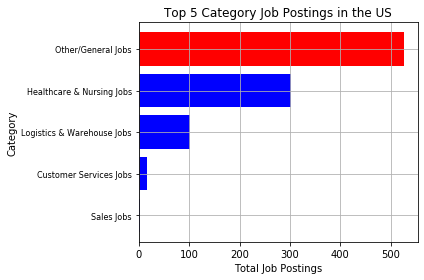

In [258]:
#Defining colors
colors = ['r','b','b','b','b']

#Defining the length of my y axis
y_pos = np.arange(len(cat_grouped_asc['category'][:5]))
#Defining my x axis
performance = cat_grouped_asc["job title"][:5]

#ploting information for y and x
plt.barh(y_pos, performance, align='center', color = colors)

#labeling y ticks and changing the label size to 8
plt.yticks(y_pos,cat_grouped_asc["category"][:5], size = 8)

#Inverting to display the top bar graph
plt.gca().invert_yaxis()  # labels read top-to-bottom

#Adding my labels, title, and definition layout
plt.ylabel('Category')
plt.xlabel('Total Job Postings')
plt.title('Top 5 Category Job Postings in the US')
plt.tight_layout()
plt.grid()

#saving
plt.savefig(catGraphData)

## Top 5 cities that have job postings

In [259]:
#Group by City and state to find the top 5 cities that have job postings
grouped_city = cleansed_data.groupby(['city','state']).count()
grouped_city = grouped_city.reset_index()
grouped_city_desc = grouped_city.sort_values(by='job title', ascending=False)
grouped_city_desc.head()

,city,state,job title,date created,category,company name,country,lat,lng,latlng,month
46,Chicago,Illinois,137,137,137,137,137,137,137,137,137
124,Henderson,Nevada,89,89,89,89,89,89,89,89,89
230,Philadelphia,Pennsylvania,64,64,64,64,64,64,64,64,64
24,Boston,Massachusetts,62,62,62,62,62,62,62,62,62
96,Farmington,California,13,13,13,13,13,13,13,13,13


### Graph: Top 5 Job Postings in each city in the US

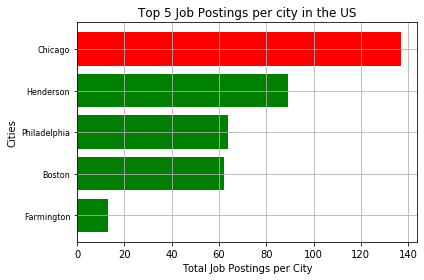

In [291]:
#Defining colors
colors = ['r','g','g','g','g']

#Defining the length of my y axis
y_pos = np.arange(len(grouped_city_desc['category'][:5]))
#Defining my x axis
performance = grouped_city_desc["job title"][:5]

#ploting information for y and x
plt.barh(y_pos, performance, align='center', color = colors)

#labeling y ticks and changing the label size to 8
plt.yticks(y_pos,grouped_city_desc["city"][:5], size = 8)

#Inverting to display the top bar graph
plt.gca().invert_yaxis()  # labels read top-to-bottom

#Adding my labels, title, and definition layout
plt.ylabel('Cities')
plt.xlabel('Total Job Postings per City')
plt.title('Top 5 Job Postings per city in the US')
plt.tight_layout()
plt.grid()

#saving
plt.savefig(cityGraphData)

## Top 5 states that offer jobs

In [261]:
#Group by state to find the top 5 states that offer jobs
grouped_state = cleansed_data.groupby(['state']).count()
grouped_state = grouped_state.reset_index()
grouped_state_desc = grouped_state.sort_values(by='job title', ascending=False)
grouped_state_desc.head()

,state,job title,date created,category,company name,city,country,lat,lng,latlng,month
11,Illinois,225,225,225,225,225,225,225,225,225,225
19,Massachusetts,145,145,145,145,145,145,145,145,145,145
26,Nevada,113,113,113,113,113,113,113,113,113,113
36,Pennsylvania,102,102,102,102,102,102,102,102,102,102
3,California,65,65,65,65,65,65,65,65,65,65


### Graph: Top 5 job postings per state in the US

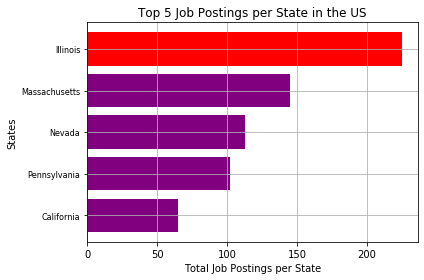

In [293]:
#Defining colors
colors = ['r','purple','purple','purple','purple']

#Defining the length of my y axis
y_pos = np.arange(len(grouped_state_desc['category'][:5]))
#Defining my x axis
performance = grouped_state_desc["job title"][:5]

#ploting information for y and x
plt.barh(y_pos, performance, align='center', color = colors)

#labeling y ticks and changing the label size to 8
plt.yticks(y_pos,grouped_state_desc["state"][:5], size = 8)

#Inverting to display the top bar graph
plt.gca().invert_yaxis()  # labels read top-to-bottom

#Adding my labels, title, and definition layout
plt.ylabel('States')
plt.xlabel('Total Job Postings per State')
plt.title('Top 5 Job Postings per State in the US')
plt.tight_layout()
plt.grid()

#saving
plt.savefig(stateGraphData)

## Top 5 Job categories for the top state in the US
* find the top state and store it in a variable
* Use the variable to filter the dataframe with only the top state data
* Find the top category for the state with the highest jobs

In [263]:
#Group by state to find the top states that offer jobs
top_state = cleansed_data.groupby(['state'])
top_state = top_state['job title']
top_state = top_state.count().idxmax()

top_state

'Illinois'

#### Filter top state with Dataframe

In [264]:
#Filter top state with Dataframe
top_state_data = cleansed_data[cleansed_data['state'].str.contains(top_state)]
top_state_data.head(3)

,job title,date created,category,company name,city,state,country,lat,lng,latlng,month
job posting id,,,,,,,,,,,
1334502463,Physician: A Locums Otolaryngologist Is Wanted...,2019-11-11 22:10:17,Healthcare & Nursing Jobs,CompHealth,Marion,Illinois,United States,37.730605,-88.933126,"37.730605,-88.933126",11
1312809651,Physician: An Orthopedic Surgeon Is Required f...,2019-10-25 12:40:21,Healthcare & Nursing Jobs,CompHealth,Niantic,Illinois,United States,39.863792,-89.154830,"39.863792,-89.15483",10
1339395641,Physician: Locums Geriatric Medicine Physician...,2019-11-15 06:42:06,Healthcare & Nursing Jobs,CompHealth,Rockford,Illinois,United States,42.331667,-89.151548,"42.331666999999996,-89.15154799999998",11


#### Find the top category for the state with the highest jobs

In [265]:
#Find the top category for the state with the highest jobs
top_state_grouped = top_state_data.groupby(['category']).count().reset_index()
tope_state_grouped_asc = top_state_grouped.sort_values(by='job title', ascending=False)
tope_state_grouped_asc

,category,job title,date created,company name,city,state,country,lat,lng,latlng,month
3,Other/General Jobs,199,199,199,199,199,199,199,199,199,199
1,Healthcare & Nursing Jobs,21,21,21,21,21,21,21,21,21,21
2,Logistics & Warehouse Jobs,4,4,4,4,4,4,4,4,4,4
0,Customer Services Jobs,1,1,1,1,1,1,1,1,1,1


### Graph: Top 5 category job postings for the top state in the US

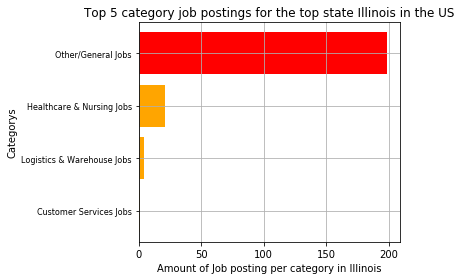

In [295]:
#Defining colors
colors = ['r','orange','orange','orange','orange']

#Defining the length of my y axis
y_pos = np.arange(len(tope_state_grouped_asc['category'][:5]))
#Defining my x axis
performance = tope_state_grouped_asc['job title'][:5]

#ploting information for y and x
plt.barh(y_pos, performance, align='center', color = colors)

#labeling y ticks and changing the label size to 8
plt.yticks(y_pos,tope_state_grouped_asc['category'][:5], size = 8)

#Inverting to display the top bar graph
plt.gca().invert_yaxis()  # labels read top-to-bottom

#Adding my labels, title, and definition layout
plt.ylabel('Categorys')
plt.xlabel(f'Amount of Job posting per category in {top_state}')
plt.title(f'Top 5 category job postings for the top state {top_state} in the US')
plt.tight_layout()
plt.grid()

#saving
plt.savefig(topStateCatGraphData)

## Top 5 Job category for the top city in the US
* find the top city and store it in a variable
* Use the variable to filter the dataframe with only the top state data
* Find the top category for the state with the highest jobs

In [267]:
#Group by city to find the top city that offer jobs
top_city = cleansed_data.groupby(['city'])
top_city = top_city['job title']
top_city = top_city.count().idxmax()

top_city

'Chicago'

#### finding the state that has the top city

In [268]:
#Group by city to find the top city and corresponding state that offer jobs
top_citystate = cleansed_data.groupby(['city','state'])
top_citystate = top_citystate['job title']
top_citystate = top_citystate.count().idxmax()
top_citystate = top_citystate[1]
top_citystate

'Illinois'

#### Filter top city with Dataframe

In [269]:
#Filter top city with Dataframe
top_city_data = cleansed_data[cleansed_data['city'].str.contains(top_city)]
top_city_data.head(3)

,job title,date created,category,company name,city,state,country,lat,lng,latlng,month
job posting id,,,,,,,,,,,
1281203248,Uber Driver Partner (Be Your Own Boss),2019-09-30 21:59:52,Other/General Jobs,Uber,Chicago,Illinois,United States,41.877521,-87.611233,"41.877521,-87.611233",9
1281200112,Make More Money this Fall Driving Your Car. Dr...,2019-09-30 21:56:50,Other/General Jobs,Uber,Chicago,Illinois,United States,41.877521,-87.611233,"41.877521,-87.611233",9
1281195544,Uber Driver-Partner: Be Your Own Boss,2019-09-30 21:52:26,Other/General Jobs,Uber,Chicago,Illinois,United States,41.877521,-87.611233,"41.877521,-87.611233",9


#### Find the top category for the city with the highest job postings

In [270]:
#Find the top category for the state with the highest jobs
top_city_grouped = top_city_data.groupby(['category']).count().reset_index()
tope_city_grouped_asc = top_city_grouped.sort_values(by='job title', ascending=False)
tope_city_grouped_asc

,category,job title,date created,company name,city,state,country,lat,lng,latlng,month
1,Other/General Jobs,151,151,151,151,151,151,151,151,151,151
0,Logistics & Warehouse Jobs,1,1,1,1,1,1,1,1,1,1


### Graph: Top 5 category job postings for the top city in the US

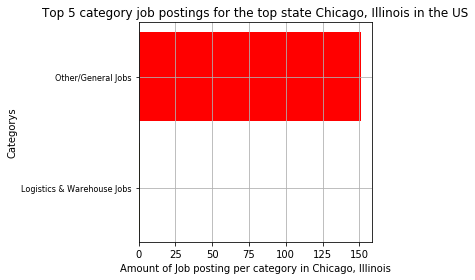

In [297]:
#Defining colors
colors = ['r','y','y','y','y']

#Defining the length of my y axis
y_pos = np.arange(len(tope_city_grouped_asc['category'][:5]))
#Defining my x axis
performance = tope_city_grouped_asc['job title'][:5]

#ploting information for y and x
plt.barh(y_pos, performance, align='center', color = colors)

#labeling y ticks and changing the label size to 8
plt.yticks(y_pos,tope_city_grouped_asc['category'][:5], size = 8)

#Inverting to display the top bar graph
plt.gca().invert_yaxis()  # labels read top-to-bottom

#Adding my labels, title, and definition layout
plt.ylabel('Categorys')
plt.xlabel(f'Amount of Job posting per category in {top_city}, {top_citystate}')
plt.title(f'Top 5 category job postings for the top state {top_city}, {top_citystate} in the US')
plt.tight_layout()
plt.grid()

#saving
plt.savefig(topCityCatGraphData)

#### Calling city_state csv to get the lat and long for city

In [272]:
#calling the csv raw data
city_csv_file = pd.read_csv(cityData)
city_csv_file.head(3)

,city,state,lat,lng
0,Alameda,California,37.609029,-121.899142
1,American Canyon,California,38.223457,-122.227043
2,Anderson,Indiana,40.105320,-85.680254


In [273]:
#grouped city by ascending order
grouped_city_asc = grouped_city.sort_values(by='job title', ascending=False)
grouped_city_asc.head()

,city,state,job title,date created,category,company name,country,lat,lng,latlng,month
46,Chicago,Illinois,137,137,137,137,137,137,137,137,137
124,Henderson,Nevada,89,89,89,89,89,89,89,89,89
230,Philadelphia,Pennsylvania,64,64,64,64,64,64,64,64,64
24,Boston,Massachusetts,62,62,62,62,62,62,62,62,62
96,Farmington,California,13,13,13,13,13,13,13,13,13


### Creating pd.datetime for column date created

In [274]:
#checking to the data types on my dataframe
cleansed_data.dtypes

job title        object
date created     object
category         object
company name     object
city             object
state            object
country          object
lat             float64
lng             float64
latlng           object
month             int64
dtype: object

#### Count of rows

In [275]:
len(cleansed_data)

953

#### Changing data type for date created column

In [276]:
#Changing data type for date created column
cleansed_data['date created'] = pd.to_datetime(cleansed_data['date created']) 
cleansed_data.dtypes

job title               object
date created    datetime64[ns]
category                object
company name            object
city                    object
state                   object
country                 object
lat                    float64
lng                    float64
latlng                  object
month                    int64
dtype: object

In [277]:
cleansed_data_copy = cleansed_data.copy()

# Creating a plot graph by grouping month
#### Grouping by month

In [278]:
date_data = cleansed_data_copy.groupby(['month']).count().reset_index()
date_data.sort_values(by = 'month', ascending = True)

,month,job title,date created,category,company name,city,state,country,lat,lng,latlng
0,6,1,1,1,1,1,1,1,1,1,1
1,8,9,9,9,9,9,9,9,9,9,9
2,9,526,526,526,526,526,526,526,526,526,526
3,10,218,218,218,218,218,218,218,218,218,218
4,11,199,199,199,199,199,199,199,199,199,199


### Graph: Top job postings per month

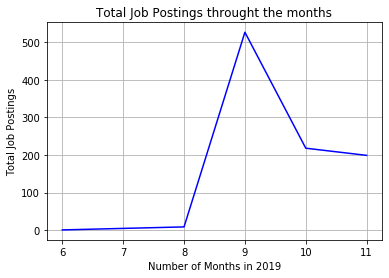

In [308]:
plt.plot(date_data['month'],date_data['job title']  , color = 'blue' )
    
plt.title("Total Job Postings throught the months")
plt.xlabel("Number of Months in 2019")
plt.ylabel("Total Job Postings")
plt.grid() 

plt.savefig(topJobsPlotPerMonth)

plt.show()

## Top state job postings per month

In [280]:

top_state_date = top_state_data.groupby(['month']).count().reset_index()
top_state_date.sort_values(by = 'month', ascending = True)

,month,job title,date created,category,company name,city,state,country,lat,lng,latlng
0,8,2,2,2,2,2,2,2,2,2,2
1,9,199,199,199,199,199,199,199,199,199,199
2,10,8,8,8,8,8,8,8,8,8,8
3,11,16,16,16,16,16,16,16,16,16,16


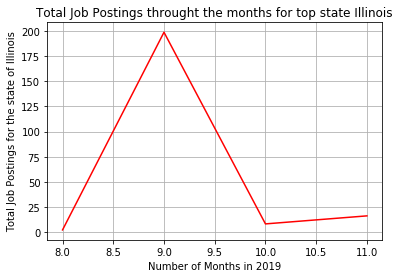

In [309]:
plt.plot(top_state_date['month'],top_state_date['job title']  , color = 'red' )
    
plt.title(f"Total Job Postings throught the months for top state {top_state}")
plt.xlabel("Number of Months in 2019")
plt.ylabel(f"Total Job Postings for the state of {top_state}")
plt.grid()

#saving
plt.savefig(topJobsPlotStateMonth)

plt.show()


## Top city job postings per month

In [283]:
top_city_date = top_city_data.groupby(['month']).count().reset_index()
top_city_date.sort_values(by = 'month', ascending = True)

,month,job title,date created,category,company name,city,state,country,lat,lng,latlng
0,9,151,151,151,151,151,151,151,151,151,151
1,11,1,1,1,1,1,1,1,1,1,1


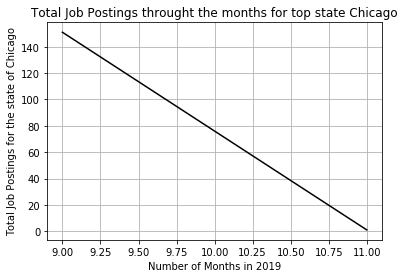

In [310]:
plt.plot(top_city_date['month'],top_city_date['job title']  , color = 'black' )
    
plt.title(f"Total Job Postings throught the months for top state {top_city}")
plt.xlabel("Number of Months in 2019")
plt.ylabel(f"Total Job Postings for the state of {top_city}")
plt.grid()

#saving
plt.savefig(topJobsPlotCityMonth)

plt.show()

#### Get the unique values for category

In [219]:
cat_unique = cleansed_data_copy['category'].unique()
cat_unique

array(['Healthcare & Nursing Jobs', 'Other/General Jobs',
       'Customer Services Jobs', 'Sales Jobs', 'Retail Jobs',
       'Logistics & Warehouse Jobs', 'Accounting & Finance Jobs'],
      dtype=object)

#### Get the unique values for month

In [202]:
months = cleansed_data['month'].unique()
months

array([10, 11,  9,  8,  6], dtype=int64)

In [211]:
#
cat_group = cleansed_data_copy.groupby(['category','month'])
cat_group.count()

job title  date created  company name  city  \
category                   month                                                
Accounting & Finance Jobs  11             1             1             1     1   
Customer Services Jobs     10             2             2             2     2   
                           11            15            15            15    15   
Healthcare & Nursing Jobs  6              1             1             1     1   
                           8              8             8             8     8   
                           10           207           207           207   207   
                           11            87            87            87    87   
Logistics & Warehouse Jobs 10             9             9             9     9   
                           11            93            93            93    93   
Other/General Jobs         9            526           526           526   526   
                           11             1             1             1     1   
Retail Jobs                8              1             1             1     1   
Sales Jobs                 11             2             2             2     2   

                                  state  country  lat  lng  latlng  
category                   month                                    
Accounting & Finance Jobs  11         1        1    1    1       1  
Customer Services Jobs     10         2        2    2    2       2  
                           11        15       15   15   15      15  
Healthcare & Nursing Jobs  6          1        1    1    1       1  
                           8          8        8    8    8       8  
                           10       207      207  207  207     207  
                           11        87       87   87   87      87  
Logistics & Warehouse Jobs 10         9        9    9    9       9  
                           11        93       93   93   93      93  
Other/General Jobs         9        526      526  526  526     526  
                           11         1        1    1    1       1  
Retail Jobs                8          1        1    1    1       1  
Sales Jobs                 11         2        2    2    2       2

#### comparing each category per month

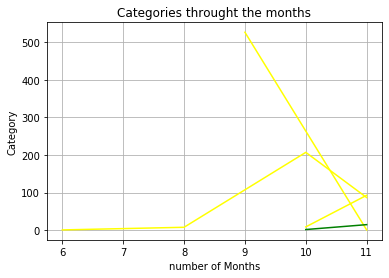

In [305]:
j = -1
for i in range(len(cat_unique)):
    df = pd.DataFrame()
    df = cleansed_data_copy[cleansed_data_copy['category'] == cat_unique[i]]
    df = df.groupby(['month'])
    df = df.count().reset_index()
    df = df.sort_values(by = 'month', ascending = True)
    
    #if statement to append to a datafram variable
    if i != j:
        j = i
        globals()['cat_%s' % i] = pd.DataFrame()
        globals()['cat_%s' % i] = globals()['cat_%s' % i].append(df)

colors  = ["red","green","blue","purple","yellow","white","black"]
        
for i in range(len(cat_unique)):
    
    color = random.choice(colors)
    plt.plot(globals()['cat_%s' % i]['month'], globals()['cat_%s' % i]['job title'] , color = color, label = '%s' % cat_unique[i] )
    
plt.title("Categories throught the months")
plt.xlabel("number of Months")
plt.ylabel("Category")
plt.grid()
plt.show()    

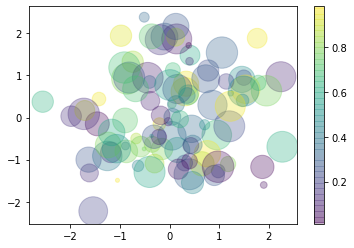

In [245]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)


plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale

### Scatter Plot

IndexError: tuple index out of range

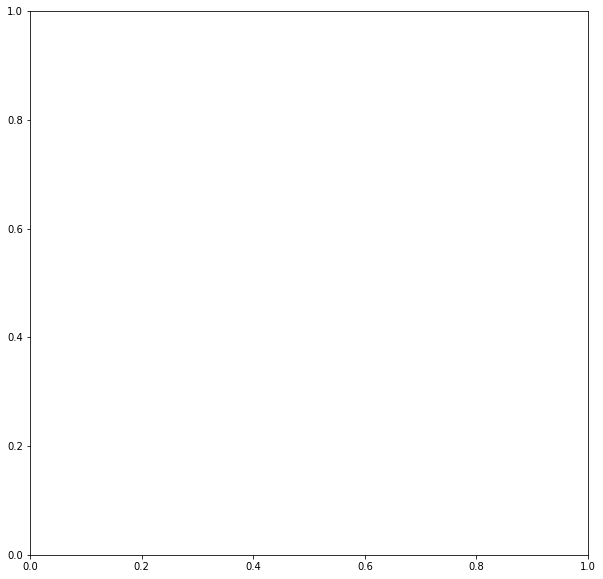

In [246]:
# city for reproducibility
length = len(grouped_city_asc)

N = grouped_city_asc['job title']
x = city_csv_file['lat']
y = city_csv_file['lng']
colors = length
area = (30 * 100)**2  # 0 to 15 point radii
plt.figure(figsize=(10,10))

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


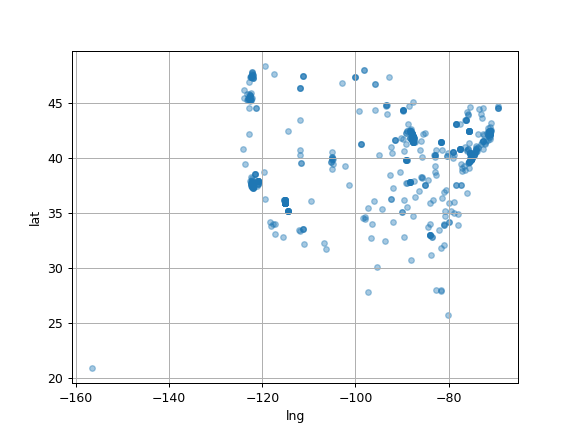

In [145]:
# function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, 
#                                    vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, 
#                                    plotnonfinite=False, data=None, **kwargs)>
cleansed_data.plot(kind="scatter", x="lng", y="lat", alpha=0.4)
plt.grid()
plt.show()

In [ ]:
lat = cleansed_data['lat'].to_numpy
lat

In [146]:
# Extract the data we're interested in
lat = cleansed_data['lat'].values
lon = cleansed_data['lng'].values
population = cat_count.to_numpy
area = cities['area_total_km2'].values

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

AttributeError: 'numpy.int32' object has no attribute 'to_numpy'

<IPython.core.display.Javascript object>


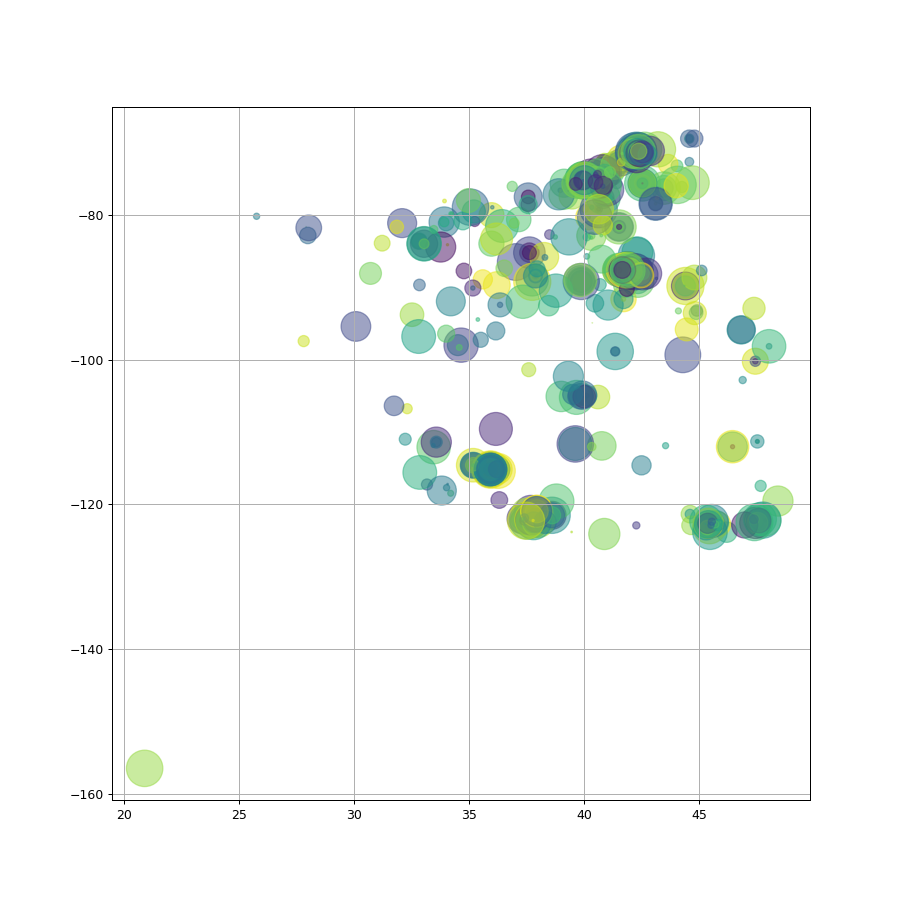

In [147]:
# Fixing random state for reproducibility
np.random.seed(19680801)


N = 953
x = cleansed_data['lat']
y = cleansed_data['lng']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
plt.figure(figsize=(10,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid()
plt.show()

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

'''install basemap, https://www.lfd.uci.edu/~gohlke/pythonlibs/'''

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

cities=pd.read_csv('C:/Users/gmitt/Downloads/simplemaps_worldcities_basicv1.5/worldcities.csv')

cities=cities[cities['country']=='United States']
print cities.head()
cities=cities[['city','lat','lng']]
print cities.head()


file='C:/Users/gmitt/Downloads/master_normalized_raw_dataframe.csv'
data = pd.read_csv(file)
data=data[['location.display_name','category.label','created','latitude','longitude','company.display_name','id']]

data.columns=['Location',"category",'created','latitude','longitude','company','id']
print data.head()
data['Location2']=data['latitude'].map(str)+","+ data['longitude'].map(str)
data['created']=pd.to_datetime(data['created'], format='%Y-%m-%dT%H:%M:%SZ')
#print data['created']
data[['City','County','State']]=data['Location'].str.split(",",expand=True)
#print data.head()
DataAll = (data.merge(cities, left_on='City', right_on='city'))
#print DataAll.head()

print DataAll
data.to_csv('C:/Users/gmitt/Downloads/jp.csv')
data1=DataAll[['City','id']]
data1 = data1.groupby(['City']).count().reset_index()
data1 = (data1.merge(cities, left_on='City', right_on='city'))
print 'data1 ---------------------'
data1=pd.DataFrame(data1)
print data1
data1=data1[['id','City','lat','lng']]
print data1
data1['id']=data1['id'].astype(int)


fig = plt.figure(figsize = (8,7))
ax = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6,
            lat_0=45, lon_0=-100,)
ax.etopo(scale=0.5, alpha=0.5)
ax.shadedrelief()
x, y = ax(data1.lng.values, data1.lat.values)
#marker_size=15
scale=(data1.id.values/50)
ax.scatter(x,y,c=data1.id.values,s=scale,
           marker='.')
plt.title("Jobs")
plt.xlabel("lng")
plt.ylabel("Lat")
cbar= plt.colorbar()
cbar.set_label("number of jobs", labelpad=+1)
plt.show()


ax=data1.plot(kind="scatter", x="lng", y="lat",
     label="jobs",
    c="id", cmap=plt.get_cmap("jet"),#x, y = ax(data1.lng.values, data1.lat.values)
    colorbar=False, alpha=0.4)#ax.scatter(x,y,)#           marker='.', color='m')

jobs1 = data1["id"]
tick_values = np.linspace(jobs1.min(), jobs1.max(), 11)

plt.legend(fontsize=16)
plt.show()




fig = plt.figure(figsize = (8,7))
#data=df.groupby('Company Name ')['Job Posting ID '].nunique()
data3 = data.groupby(by='company', as_index=False).agg({'id': pd.Series.nunique}).sort_values(by=['id'])
ax = data3.plot.barh(x='company', y='id', rot=45)
plt.show()

fig = plt.figure(figsize = (8,7))
#data=df.groupby('Company Name ')['Job Posting ID '].nunique()
data1 = data.groupby(by='City', as_index=False).agg({'id': pd.Series.nunique}).sort_values(by=['id'])
ax = data1.plot.barh(x='City', y='id', rot=45)
plt.show()


fig = plt.figure(figsize = (8,7))
#data=df.groupby('Company Name ')['Job Posting ID '].nunique()
data2 = data.groupby(by='category', as_index=False).agg({'id': pd.Series.nunique}).sort_values(by=['id'])
ax = data2.plot.barh(x='category', y='id', rot=45)
plt.show()

SyntaxError: invalid syntax (<ipython-input-199-b0dd83ed6251>, line 19)